# **BlackJack 21 Simulator!**

In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Introduction to BlackJack**

**BlackJack**, also know as Twenty One due to the special role of the number in the game, is arguably the oldest known casino game. The game played with 1 to 8 deck of cards allows the player to directly play against the casino and remains **one of the only mathematically beatable casino games.**

A small introduction of the rules can be found on the link: [Intro Video](https://www.youtube.com/watch?v=DwwaJGStuP0)

As seen a total of 5 actions can be taken by the player:


*   **Hit:** Draws a card
*   **Stand:** No more card to draw
*   **Double:** Doubles the bet and draws one card and stands
*   **Split:** Splits a value pair into two individual hands to play separately
*   **Surrender:** Forfiets the game by splitting the bet amount equally between the Casino and the Player.

## **Creating a Standard BlackJack Deck**

BlackJack is played with a standard deck of 52 cards with all cards from 2 to 9 representing facevalues, 10, J, Q, K representing 10 and A representing both 1 and 11 depending upon the situation.


We create our deck with 4 10s instead of 10, J, Q, K for simplicity of code.

In [ ]:
def newdeck(num_decks):
  std_deck = [str(i)+str(j) for i in [2,3,4,5,6,7,8,9,10,10,10,10,11] for j in ["S", "H", "C", "D"]]
  play_deck = std_deck*num_decks

  random.shuffle(play_deck)
  return play_deck[:]

## **Edward Thorp's Beat the Dealer**

In 1962, Edward Thorp published the first edition of his book ***Beat the Dealer*** solely dedicated to understanding the game of BlackJack and developing human strategies to excel at the game. As a result, the readers were able to earn great profits. Over the next few years, Casinos started taking measures to counter the so called *method players* including adding extra decks and shuffling very often to disrupt the strategies. 

In 1966, Thorp published a corrected and extended version of "Beat the Dealer" which to date proves to be the best human played strategy of the game.

Though the best method referred above is a Counting Cards strategy, Thorp also gave a basic strategy to provide a reference of actions in regular situations.
With the entire strategy learnt to heart, Thorp calculated a **long term return of +0.13%** which was the first time player advantage over the casino.

#### **Draw or Stand**
<center>

<br>

 ***Hard Totals*** 

You have ⬇ | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
:--------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:
17|S|S|S|S|S|**S**|**S**|**S**|**S**|**S**
16|S|S|S|S|S|D|D|D|**^**|D
15|S|S|S|S|S|D|D|D|D|D
14|S|S|S|S|S|D|D|D|*|D
13|**S**|**S**|S|S|S|D|D|D|D|D
12|D|D|**S**|**S**|**S**|D|D|D|D|D

<font size="2">
`^`➡ Draw if holding two cards and stand if holding more <br> </font>
<font size="2">
`*`➡ Stand if holding (7,7) </font>

<br>
<br>

***Soft Totals***


You have ⬇ | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
:--------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:
19|S|S|S|S|S|S|S|**S**|**S**|S
18|**S**|**S**|**S**|**S**|**S**|**S**|**S**|D|D|**S**

</center>


#### **Double**

<center>
<br>

***Hard Totals***

You have ⬇ | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
:--------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:
11|Y|Y|Y|Y|Y|Y|Y|Y|**Y**|**Y**
10|Y|Y|Y|Y|Y|**Y**|**Y**|**Y**|N|N
9|**Y**|**Y**|**Y**|**Y**|**Y**|N|N|N|N|N
8|N|N|N|*|*|N|N|N|N|N

<font size="2">
 `*` ➡ Double down except with (6,2)
 </font>
 <br>
 <br>

 ***Soft Totals***

 You have ⬇ | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
:--------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:
A,7|N|Y|Y|Y|Y|N|N|N|N|N
A,6|Y|Y|Y|Y|Y|N|N|N|N|N
A,5|N|N|Y|Y|Y|N|N|N|N|N
A,4|N|N|Y|Y|Y|N|N|N|N|N
A,3|N|N|Y|Y|Y|N|N|N|N|N
A,2|N|N|Y|Y|Y|N|N|N|N|N
A,A*|N|N|N|Y|Y|N|N|N|N|N

<font size="2">
`*`➡ Double down with (A,A) only if splitting isn't allowed.</center>
</font>

#### **Pair Splitting**

<center>

You have ⬇ | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
:--------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:
A,A|Y|Y|Y|Y|Y|Y|Y|Y|Y|Y
10,10|N|N|N|N|N|N|N|N|N|N
9,9|Y|Y|Y|Y|Y|N|Y|Y|N|N
8,8|Y|Y|Y|Y|Y|Y|Y|Y|Y|Y
7,7|Y|Y|Y|Y|Y|Y|Y|N|N|N
6,6|Y|Y|Y|Y|Y|Y|N|N|N|N
5,5|N|N|N|N|N|N|N|N|N|N
4,4|N|N|N|Y|N|N|N|N|N|N
3,3|Y|Y|Y|Y|Y|Y|N|N|N|N
2,2|Y|Y|Y|Y|Y|Y|N|N|N|N

</center>

In [ ]:
def play(strategy, deck, num_decks, playercards, dealercards, bet, policy = None, rewards = None):

  
  # Dealer's first card is shown and second is hidden

  if strategy == "basic_strategy":

    hit_stand = {"hard": {2:13, 3:13, 4:12, 5:12, 6:12, 7:17, 8:17, 9:17, 10:17, 11:17}, 
                 "soft" : {2:18, 3:18, 4:18, 5:18, 6:18, 7:18, 8:18, 9:19, 10:19, 11:18}}
  
    double = {"hard": {2:[9,10,11], 3:[9,10,11], 4:[9,10,11], 5:[9,10,11], 6:[9,10,11], 7: [10,11], 8: [10,11], 9: [10,11], 10: [11], 11: [11]}, 
              "soft" : {2 : [17] , 3: [18,17] , 4:[13,14,15,16,17,18], 5:[12,13,14,15,16,17,18], 6:[12,13,14,15,16,17,18], 7:[], 8:[], 9:[], 10:[], 11:[]}}

    pair = {11: [2,3,4,5,6,7,8,9,10,11], 10: [], 9:[2,3,4,5,6,8,9], 8:[2,3,4,5,6,7,8,9,10,11], 
            7:[2,3,4,5,6,7,8], 6:[2,3,4,5,6,7], 5:[], 4:[5], 3:[2,3,4,5,6,7], 2:[2,3,4,5,6,7]}

    double_happend = False

    # Dealer and Player BlackJack
    if int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21 and int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
      return bet

    # Dealer BlackJack
    elif int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21:
      return 0

    # Player BlackJack
    elif int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
      return bet*2.5

    # Do we have a pair
    '''if playercards[0][:-1] == playercards[1][:-1]:

      # Do we want to split the pair?
      if int(dealercards[0][:-1]) in pair[int(playercards[0][:-1])]:

        # Yes 
        pass
      pass'''

    # Check for soft hand
    if playercards[0][:-1] == "11" or playercards[1][:-1] == "11":
      playersum = int(playercards[0][:-1]) + int(playercards[1][:-1])

      # Check for Double
      if playersum in double["soft"][int(dealercards[0][:-1])]:
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        playersum+=int(playercards[-1][:-1])
        double_happend=True
        if playersum>21:
          playersum-=10
      
      # Hit the soft hand
      else:
        hard = False
        while playersum<21:
          if playersum >= hit_stand["soft"][int(dealercards[0][:-1])]:
            break
          if len(deck) == 0:
            deck = newdeck(num_decks)
          playercards.append(deck.pop())
          playersum+=int(playercards[-1][:-1])
          if playercards[-1][:-1]=="11":
            playersum-=10
        if playersum>21 and not hard:
          playersum-=10
          hard = True
        if hard:
          while playersum<hit_stand["hard"][int(dealercards[0][:-1])]:
            if len(deck) == 0:
              deck = newdeck(num_decks)
            playercards.append(deck.pop())
            if int(playercards[-1][:-1]) == 11:
              playersum+=1
            else:
              playersum+=int(playercards[-1][:-1])


    # Hard Hand
    else:
      playersum = int(playercards[0][:-1]) + int(playercards[1][:-1])

      # Check for Double
      if playersum in double["hard"][int(dealercards[0][:-1])]: 
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        double_happend=True
        if playersum==11 and int(playercards[-1][:-1])==11:
          playersum=12
        else:
          playersum+=int(playercards[-1][:-1])

      elif playersum >= hit_stand["hard"][int(dealercards[0][:-1])]: 
        # Stand
        pass
        
      else: #hit
        if playersum>11:
          while playersum<hit_stand["hard"][int(dealercards[0][:-1])]:
            if len(deck) == 0:
              deck = newdeck(num_decks)
            playercards.append(deck.pop())
            if int(playercards[-1][:-1]) == 11:
              playersum+=1
            else:
              playersum+=int(playercards[-1][:-1])
        else:
          oneace = False
          hard = True
          while playersum < hit_stand["hard"][int(dealercards[0][:-1])]:
            if len(deck) == 0:
              deck = newdeck(num_decks)
            playercards.append(deck.pop())
            if (int(playercards[-1][:-1]) == 11 and oneace) or playersum>=11:
              playersum+=1
            elif int(playercards[-1][:-1]) == 11:
              oneace = True
              hard = False
              playersum+=11
            else:
              playersum+=int(playercards[-1][:-1])
              if playersum>21 and not hard:
                playersum-=10
                hard = True

    if playersum>21:
      return 0
    #print(playercards)

    if int(dealercards[0][:-1])==11 or int(dealercards[1][:-1])==11:
      dealeroneace=True
      dealerhard = False
    else:
      dealeroneace=False
      dealerhard = True
    
    dealersum = int(dealercards[0][:-1]) + int(dealercards[1][:-1])
    while dealersum<17:
      if len(deck) == 0:
        deck = newdeck(num_decks)
      dealercards.append(deck.pop())
      if dealercards[-1][:-1]=="11" and (dealeroneace or dealersum>=11):
        dealersum+=1
      elif dealercards[-1][:-1]=="11":
        dealersum+=11
        dealerhard = False
        dealeroneace=True
      elif dealersum + int(dealercards[-1][:-1])>21 and not dealerhard:
        dealersum-=10
        dealersum+=int(dealercards[-1][:-1])
        dealerhard=True
      else:
        dealersum += int(dealercards[-1][:-1])
      
      #print(dealercards)
    
    if dealersum>21 or playersum>dealersum:
      if double_happend:
        return bet*3
      return bet*2
    elif playersum==dealersum:
      return bet
    else:
      return -bet if double_happend else 0

  elif strategy == "human":

    playersum = int(playercards[0][:-1]) + int(playercards[1][:-1])
    print("Player Cards are:", playercards)
    print("Sum of your cards is", playersum)
    print()
    print("Dealer's open card is:", dealercards[0])
    doublehappend = False

    if int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21 and int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
      print("Both Dealer and Player BlackJack. It's a tie")
      return bet

    # Dealer BlackJack
    elif int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21:
      print("Dealer BlackJack. Dealer wins")
      return 0

    # Player BlackJack
    elif int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
      print("Player BlackJack!!! Player wins!")
      return bet*2.5

    hard = True
    oneace = False
    if playercards[0][:-1] == "11" or playercards[1][:-1]=="11":
      hard = False
      oneace=True
    
    while True:
      action = input()
      if action.lower() == "stand":
        break
      elif action.lower() == "hit":
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        print(playercards)
        if playercards[-1][:-1] == "11" and (playersum>=11 or oneace):
          playersum+=1
        elif playercards[-1][:-1] =="11":
          playersum+=11
          hard=False
          oneace = True
        elif playersum + int(playercards[-1][:-1])>21 and not hard:
          playersum-=10
          playersum+=int(playercards[-1][:-1])
          hard = True
        else:
          playersum+=int(playercards[-1][:-1])
        
        print("Sum of your cards is", playersum)
        if playersum>21:
          break
        
      elif action.lower() == "double":
        if playersum>11:
          print("Double not allowed. Choose another action")
          continue
        
        doublehappend=True
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        print(playercards)

        if playercards[-1][:-1]=="11":
          playersum+=1
        else:
          playersum+=int(playercards[-1][:-1])
        print("Sum of your cards is", playersum)
        break
      elif action.lower() == "split":
        print("Code pending. Choose another action")
      elif action.lower() == "surrender":
        return round(bet/2, 2)
      else:
        print("Action", action, "not identified. Please check your action")
    
    if int(dealercards[0][:-1])==11 or int(dealercards[1][:-1])==11:
      dealeroneace=True
      dealerhard = False
    else:
      dealeroneace=False
      dealerhard = True
    if playersum>21:
      print("Player Busts! Dealer wins.")
      return 0
    print("The Dealer's cards are:", dealercards)
    
    dealersum = int(dealercards[0][:-1]) + int(dealercards[1][:-1])
    print("Dealer's sum is", dealersum)

    while dealersum<17:
      time.sleep(1)
      if len(deck) == 0:
        deck = newdeck(num_decks)
      print("Dealer hits!")
      dealercards.append(deck.pop())
      print("The Dealer's cards are:", dealercards)
      if dealercards[-1][:-1]=="11" and (dealeroneace or dealersum>=11):
        dealersum+=1
      elif dealercards[-1][:-1]=="11":
        dealersum+=11
        dealerhard = False
        dealeroneace=True
      elif dealersum + int(dealercards[-1][:-1])>21 and not dealerhard:
        dealersum-=10
        dealersum+=int(dealercards[-1][:-1])
        dealerhard=True
      else:
        dealersum += int(dealercards[-1][:-1])
      print("Dealer sum is", dealersum)
      time.sleep(1)
    
    if dealersum>21 or playersum>dealersum:
      print("Player wins!")
      if doublehappend:
        return bet*3
      return bet*2
    elif playersum==dealersum:
      print("It's a Draw")
      return bet
    else:
      print("Dealer wins.")
      return -bet if doublehappend else 0




In [ ]:
def BlackJack(num_decks, strategy, num_games, bet, policy=None, rewards = None, exploration = "epsilon_greedy", explo_param = 0.1):
  deck = newdeck(num_decks)
  moneyspent = -num_games*bet
  for i in range(num_games):
    #print("Game:", i+1)
    playercards = []
    dealercards = []

    # Giving out Initial Cards
    if len(deck) == 0:
      deck = newdeck(num_decks)
    playercards.append(deck.pop())
    if len(deck) == 0:
      deck = newdeck(num_decks)
    dealercards.append(deck.pop())
    if len(deck) == 0:
      deck = newdeck(num_decks)
    playercards.append(deck.pop())
    if len(deck) == 0:
      deck = newdeck(num_decks)
    dealercards.append(deck.pop())

    # Playing with respect to a strategy
    if strategy == "agent":
      gameresult = agents_play(deck, num_decks, playercards, dealercards, bet, policy, rewards, exploration, explo_param)
    else:
      gameresult = play(strategy, deck, num_decks, playercards, dealercards, bet)
    
    moneyspent+=gameresult
    #print(moneyspent)
    if strategy == "human":
      print("Winnings:", gameresult)
      print()
      time.sleep(2)
      print("Total Winnings:", end=" ")
  return moneyspent

## **Let us Play!!**




In [ ]:

num_decks=2
num_hands=2
bet_amount=5

#(BlackJack(num_decks, "human", num_hands, bet_amount))


## **Test of the basic strategy**

In [ ]:
profits = []
num_decks=2
num_hands = 10000
num_simulations = 1000
bet_amount = 1

for i in range(num_simulations):
  profits.append(BlackJack(num_decks, "basic_strategy", num_hands, bet_amount))

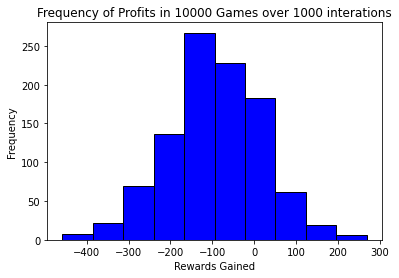

In [ ]:
plt.title("Frequency of Profits in 10000 Games over 1000 interations")
plt.xlabel("Rewards Gained")
plt.ylabel("Frequency")
plt.hist(profits, color = 'blue', edgecolor = 'black')
plt.show()
#plt.savefig("BasicStrategy Profit.png")

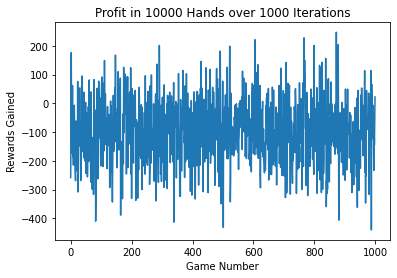

In [ ]:
plt.title("Profit in 10000 Hands over 1000 Iterations")
plt.ylabel("Rewards Gained")
plt.xlabel("Game Number")
plt.plot(profits)
plt.show()
#plt.savefig("Basic Strategy Games")

In [ ]:
print(sum(profits)/len(profits))

-97.5325


## **Reinforcement Learning**

The idea that we learn by interacting with our environment is probably the first to occur to us when we think about the nature of learning. Reinforcement Learning is the **computational approach of learning by interacting with the environment.** Rather than directly theorizing about how people or animals learn, we primarily explore idealized learning situations and evaluate the effectiveness of various learning methods.

So, Reinforcement Learning is learning what to do — **how to map situations to actions** — so as **to maximize a numerical reward signal.**

We formalize the problem of reinforcement learning using ideas from dynamical systems theory, specifically, as the optimal control of incompletely-known **Markov decision processes.** Markov decision processes are intended to include just three aspects—**sensation, action, and goal**—in their simplest possible forms without trivializing any of them.

We **initialise a policy** that the agent follows while playing the game of BlackJack for a **reference of actions** to be taken in **various possible states**.
Reinforcement Learning allows for different ways to initialise a policy resulting in different convergence rates to the optimal policy. For the current project, we chose a random policy initialisation.

In [ ]:
policy = {"H{}".format(i):np.random.choice(["hit", "stand", "double", "surrender"], 10) for i in range(4,21)}
for i in range(12,21):
  policy["S{}".format(i)] = np.random.choice(["hit", "stand", "double", "surrender"], 10)

In [ ]:
def print_policy(policy):
  num_pchoices = len(policy)
  print("You have ⬇ | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} | {: ^9} |".format(2,3,4,5,6,7,8,9,10,11))
  print()
  for i in policy:
    print("{: ^11}|".format(i), end = "")
    for dealersum in range(10):
      print(" {: ^9} |".format(policy[i][dealersum]), end = "")
    print()

In [ ]:
print_policy(policy)

You have ⬇ |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |    11     |

    H4     |  double   | surrender | surrender | surrender |   stand   |  double   |    hit    | surrender | surrender |    hit    |
    H5     | surrender |   stand   | surrender |   stand   |    hit    |  double   |   stand   |  double   | surrender |    hit    |
    H6     |   stand   |    hit    | surrender | surrender |  double   | surrender |   stand   |   stand   |   stand   | surrender |
    H7     |   stand   | surrender |   stand   |  double   |   stand   | surrender | surrender |   stand   |  double   |    hit    |
    H8     |   stand   |  double   |    hit    |    hit    |    hit    |    hit    |    hit    |   stand   | surrender |  double   |
    H9     |   stand   |   stand   |    hit    | surrender |   stand   |    hit    |   stand   |    hit    |   stand   | surrender |
    H10    | surrender |   stand   |   stand   | surrender |    hit 

#### **Exploration vs Exploitation**

<br>

**Greedy action selection always exploits** current knowledge to maximize immediate reward; it spends no time at all sampling apparently inferior actions to see if they might really be better. A simple **alternative is to behave greedily most of the time, but every once in a while**, say with small probability ε, instead **select randomly from among all the actions** with equal probability, independently of the action-value estimates. We call methods using this near-greedy action selection rule **ε-greedy methods**.

<br>

Exploration is an important concept to achieve optimal values of different actions in various states. The above described method has been implemented below along with the agents strategy and exploration parameter but there are more exploration methods, namely upper confidence bound, optimistic greedy, gradient bandits etc. which we can compare to find the best results.

In [ ]:
def agents_play(deck, num_decks, playercards, dealercards, bet, policy, rewards, exploration, explo_param):

  if int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21 and int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
    return bet

    # Dealer BlackJack
  elif int(dealercards[0][:-1]) + int(dealercards[1][:-1]) == 21:
    return 0

    # Player BlackJack
  elif int(playercards[0][:-1]) + int(playercards[1][:-1]) == 21:
    return bet*2.5

  playersum = int(playercards[0][:-1]) + int(playercards[1][:-1])
  doublehappend = False
  hard = True
  oneace = False
  if playercards[0][:-1] == "11" or playercards[1][:-1]=="11":
    hard = False
    oneace=True
  if playersum>21:
    playersum-=10
    
  if exploration == "epsilon_greedy":
    all_actions = []
    while True:
      if hard:
        greedy_action = policy["H{}".format(playersum)][int(dealercards[0][:-1])-2]
      else:
        greedy_action = policy["S{}".format(playersum)][int(dealercards[0][:-1])-2]
      #print("Greedy Action:", greedy_action)
      if np.random.uniform(0,1) >= explo_param:
        action = greedy_action
      else:
        non_greedy = ["hit", "stand", "double", "surrender"]
        non_greedy.remove(greedy_action)
        #print(non_greedy)
        action = np.random.choice(non_greedy, 1)[0]

      #print(action)
      if hard:
        all_actions.append(["H{}".format(playersum), int(dealercards[0][:-1]), action])
      else:
        all_actions.append(["S{}".format(playersum), int(dealercards[0][:-1]), action])

      if action.lower() == "stand":
        break
      elif action.lower() == "hit":
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        
        if playercards[-1][:-1] == "11" and (playersum>=11 or oneace):
          playersum+=1
        elif playercards[-1][:-1] =="11":
          playersum+=11
          hard=False
          oneace = True
        elif playersum + int(playercards[-1][:-1])>21 and not hard:
          playersum-=10
          playersum+=int(playercards[-1][:-1])
          hard = True
        else:
          playersum+=int(playercards[-1][:-1])
        
        #print("Sum of your cards is", playersum)
        if playersum>=21:
          break
        
      elif action.lower() == "double":
        #if playersum>11:
         # print("Double not allowed. Choose another action")
          #continue
        
        doublehappend=True
        if len(deck) == 0:
          deck = newdeck(num_decks)
        playercards.append(deck.pop())
        #print(playercards)

        if playercards[-1][:-1]=="11" and playersum>=11:
          playersum+=1
        else:
          playersum+=int(playercards[-1][:-1])
        #print("Sum of your cards is", playersum)
        if playersum>21:
          walkaway = -bet
          update_rewards(rewards, all_actions, walkaway)
          return walkaway
        break
      #elif action.lower() == "split":
        #print("Code pending. Choose another action")
      elif action.lower() == "surrender":
        walkaway = round(bet/2, 2)
        update_rewards(rewards, all_actions, walkaway)
        return walkaway
      #else:
       # print("Action", action, "not identified. Please check your action")

    
    
    if int(dealercards[0][:-1])==11 or int(dealercards[1][:-1])==11:
      dealeroneace=True
      dealerhard = False
    else:
      dealeroneace=False
      dealerhard = True
    if playersum>21:
      #print("Player Busts! Dealer wins.")
      walkaway = 0
      update_rewards(rewards, all_actions, walkaway)
      return walkaway
    #print("The Dealer's cards are:", dealercards)
    
    dealersum = int(dealercards[0][:-1]) + int(dealercards[1][:-1])
    #print("Dealer's sum is", dealersum)


    while dealersum<17:
      #time.sleep(1)
      if len(deck) == 0:
        deck = newdeck(num_decks)
      #print("Dealer hits!")
      dealercards.append(deck.pop())
      #print("The Dealer's cards are:", dealercards)
      if dealercards[-1][:-1]=="11" and (dealeroneace or dealersum>=11):
        dealersum+=1
      elif dealercards[-1][:-1]=="11":
        dealersum+=11
        dealerhard = False
        dealeroneace=True
      elif dealersum + int(dealercards[-1][:-1])>21 and not dealerhard:
        dealersum-=10
        dealersum+=int(dealercards[-1][:-1])
        dealerhard=True
      else:
        dealersum += int(dealercards[-1][:-1])
      #print("Dealer sum is", dealersum)
      #time.sleep(1)
    
    if dealersum>21 or playersum>dealersum:
      #print("Player wins!")
      if doublehappend:
        walkaway = bet*3
      else:
        walkaway = bet*2
    elif playersum==dealersum:
      #print("It's a Draw")
      walkaway = bet
    else:
      #print("Dealer wins.")
      walkaway = -bet if doublehappend else 0  


    update_rewards(rewards, all_actions, walkaway)
  #print(walkaway)
  return walkaway

In [ ]:
def initialise_rewards():

  reward = {"H{}".format(i):{"hit":[[0]*2 for _ in range(10)], "stand":[[0]*2 for _ in range(10)], "double":[[0]*2 for _ in range(10)], "surrender":[[0]*2 for _ in range(10)]} for i in range(4,21)}
  for i in range(12,21):
    reward["S{}".format(i)] = {"hit":[[0]*2 for _ in range(10)], "stand":[[0]*2 for _ in range(10)], "double":[[0]*2 for _ in range(10)], "surrender":[[0]*2 for _ in range(10)]}
  return reward
#reward

In [ ]:
def update_policy(policy, reward):
  actions = ["hit", "stand", "double", "surrender"]
  for yoursum in reward:
    #print("You Have:", yoursum)
    for dealersum in range(10):
      #print("Dealer have:", dealersum)
      bestaction = None
      best_reward = -float("inf")
      for action in actions:
        if reward[yoursum][action][dealersum][0]>best_reward:
          bestaction = action
          best_reward = reward[yoursum][action][dealersum][0]
      
      policy[yoursum][dealersum] = bestaction
  return

In [ ]:
def update_rewards (rewards, all_actions, walkaway):
  for actionchosen in all_actions:
    rsofar = rewards[actionchosen[0]][actionchosen[2]][actionchosen[1]-2][0]
    csofar = rewards[actionchosen[0]][actionchosen[2]][actionchosen[1]-2][1]
    rsofar = (rsofar*csofar +walkaway)/(csofar+1)
    csofar+=1
    rewards[actionchosen[0]][actionchosen[2]][actionchosen[1]-2][0] = rsofar
    rewards[actionchosen[0]][actionchosen[2]][actionchosen[1]-2][1] = csofar

In [ ]:
reward = initialise_rewards()

In [ ]:
profits1 = []
num_decks=2
num_hands = 10000
num_simulations = 1000
bet_amount = 1

for i in range(num_simulations):
  profits1.append(BlackJack(num_decks, "agent", num_hands, bet_amount, policy, initialise_rewards(), explo_param = 0))

In [ ]:
sum(profits1)/len(profits1)

-4591.905

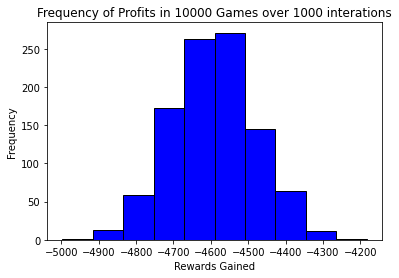

In [ ]:
plt.title("Frequency of Profits in 10000 Games over 1000 interations")
plt.xlabel("Rewards Gained")
plt.ylabel("Frequency")
plt.hist(profits1, color = 'blue', edgecolor = 'black')
plt.show()
#plt.savefig("Random Strategy.png")

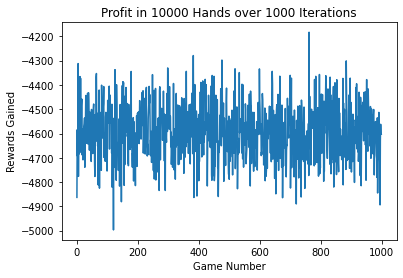

In [ ]:
plt.title("Profit in 10000 Hands over 1000 Iterations")
plt.ylabel("Rewards Gained")
plt.xlabel("Game Number")
plt.plot(profits1)
#plt.savefig("Basic Strategy Games")

In [ ]:
num_decks=2
num_hands=1000
bet_amount=1

BlackJack(num_decks, "agent", num_hands, bet_amount, policy, initialise_rewards())

-454.5

In [ ]:
num_decks=2
num_hands=1000
bet_amount=1
wins = []

for _ in range(10000):
  winnings = BlackJack(num_decks, "agent", num_hands, bet_amount, policy, reward)
  update_policy(policy, reward)
  wins.append(winnings)
  #print(winnings)

In [ ]:
sum(wins)/len(wins)

-74.5172

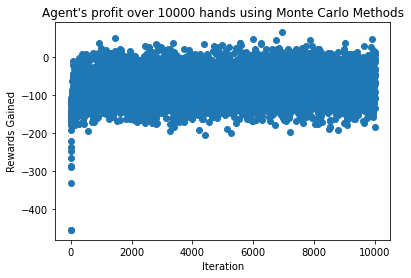

In [ ]:
plt.title("Agent's profit over 10000 hands using Monte Carlo Methods")
plt.ylabel("Rewards Gained")
plt.xlabel("Iteration")

plt.scatter([i for i in range(len(wins))], wins)
#plt.savefig("Monte Carlo Games")

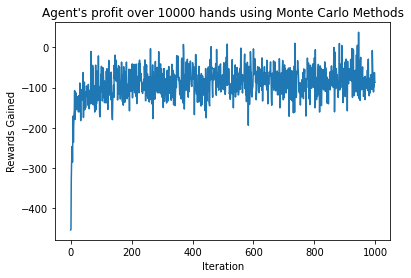

In [ ]:
plt.title("Agent's profit over 10000 hands using Monte Carlo Methods")
plt.ylabel("Rewards Gained")
plt.xlabel("Iteration")
plt.plot(wins[:1000])
plt.savefig("Monte Carlo Games 1")

In [ ]:
print_policy(policy)

You have ⬇ |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |    11     |

    H4     |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |
    H5     |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |
    H6     |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |
    H7     |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |
    H8     |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |    hit    |
    H9     |  double   |  double   |  double   |  double   |  double   |  double   |    hit    |    hit    |    hit    |    hit    |
    H10    |  double   |  double   |  double   |  double   |  double

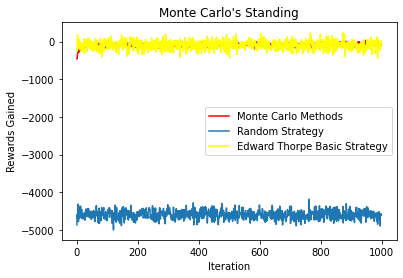

In [ ]:
plt.title("Monte Carlo's Standing")
plt.xlabel("Iteration")
plt.ylabel("Rewards Gained")

plt.plot(wins[:1000], label="Monte Carlo Methods", color= "red")
plt.plot(profits1, label="Random Strategy")
plt.plot(profits, label="Edward Thorpe Basic Strategy", color= "yellow")
plt.legend()
plt.show()